### Code for generation of Figure 1
_Integrative analysis of cell state changes in lung fibrosis with peripheral protein biomarkers'_ 
in EMBO Molecular Medicine. <br> 
Christoph H. Mayr, Lukas M. Simon, Gabriela Leuschner, et al. and Fabian J. Theis, Herbert Schiller

In [1]:
## This Notebook is based on the anndata object for the Munich cohort generated in
## integrate_munich_chicago_nashville_cohorts.ipynb

import scanpy as sc
import bbknn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore")

from matplotlib import colors
colorsComb = np.vstack([plt.cm.Reds(np.linspace(0, 1, 128)), plt.cm.Greys_r(np.linspace(0.7, 0.8, 0))])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

plt.rcParams['figure.figsize'] = (6, 5)
folder = "~/20200210_Schiller_humanILD_meshal.ansari/"

sc.logging.print_version_and_date()

Running Scanpy 1.6.1.dev110+gb4234d81, on 2021-02-11 12:33.


### Read in Data Object

In [2]:
munich = sc.read(folder + "munich_cohort_raw_counts.mtx")
munich.obs_names = pd.read_csv(folder + "munich_cohort_barcodes.txt", header = None).iloc[:, 0].values
munich.var_names = pd.read_csv(folder + "integrated_cohorts_genes.txt", header = None).iloc[:, 0].values
munich_meta = pd.read_csv(folder + "munich_cohort_metadata.txt", sep = "\t", index_col = 0)
munich.obs = munich_meta.iloc[:, 2:].loc[munich.obs_names]

sc._utils.sanitize_anndata(munich)
munich

... storing 'patient_id' as categorical
... storing 'health_status' as categorical
... storing 'cell_type' as categorical
... storing 'tissue_label' as categorical


AnnData object with n_obs × n_vars = 38648 × 38615
    obs: 'patient_id', 'louvain', 'health_status', 'cell_type', 'tissue_label', 'n_counts', 'n_genes', 'percent.mito', 'size_factors'

In [3]:
## Normalize adata and log-transform
munich.X /= munich.obs['size_factors'].values[:,None]
sc.pp.log1p(munich)

## Set Coordinates based on meta file to be consistend with figures
munich.obsm["X_umap"] = munich_meta.loc[munich.obs_names, ["umap_1", "umap_2"]].values

#### Figure 1 a) UMAP of single cell transcriptomic data coloured by disease status

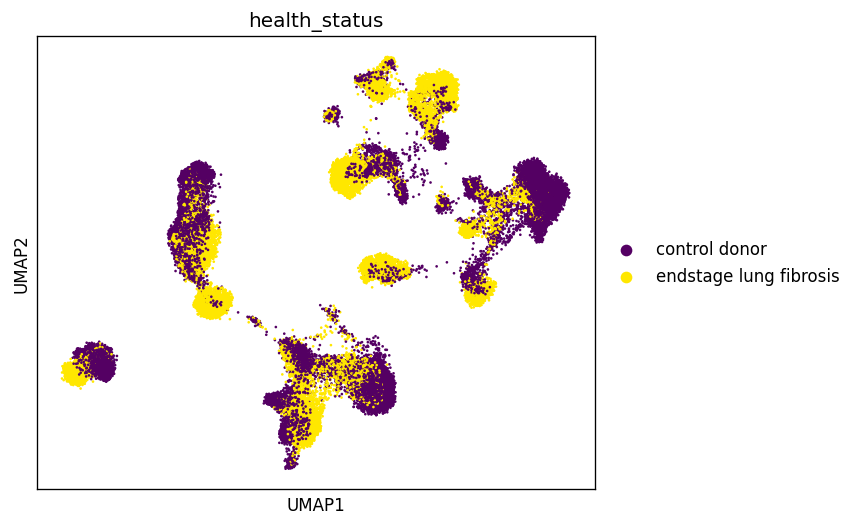

In [4]:
sc.pl.umap(munich, color = ["health_status"], palette = ["#540063", "#FFE700"], size = 10,
           ax = plt.figure(figsize = (6, 5), dpi = 120).gca())

#### Figure 1 b) UMAP of single cell transcriptomic data coloured by cell type identity

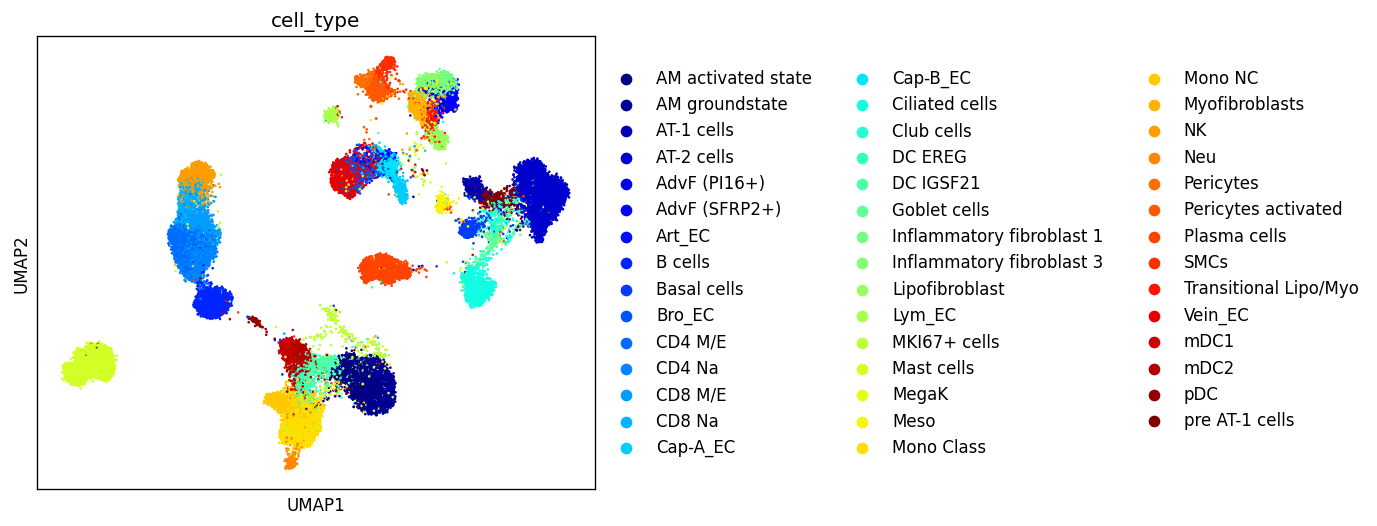

In [5]:
sc.pl.umap(munich, color = ["cell_type"], palette = "jet", size = 10,
           ax = plt.figure(figsize = (6, 5), dpi = 120).gca())

#### Figure 1 c-f) UMAP of single cell transcriptomic data coloured by lineage marker genes

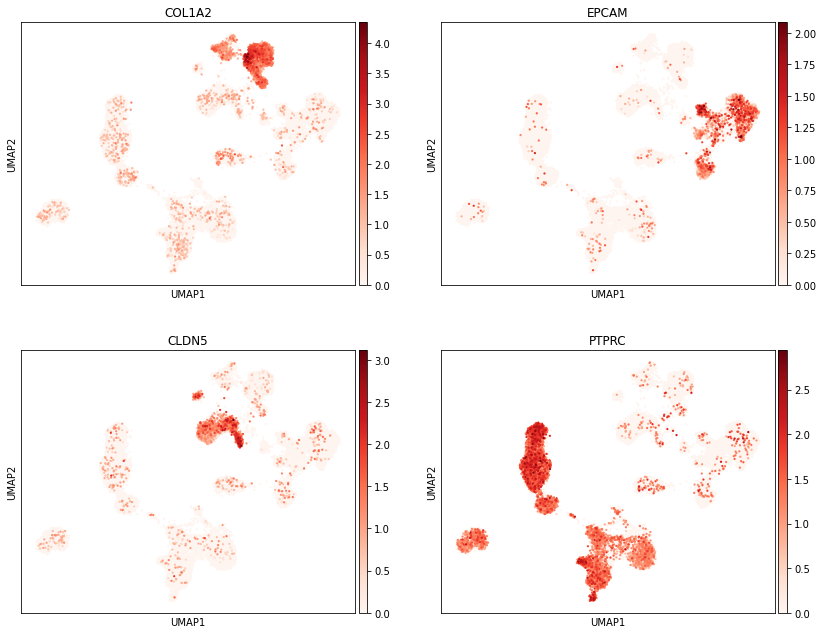

In [6]:
sc.pl.umap(munich, color = ["COL1A2", "EPCAM", "CLDN5", "PTPRC"], ncols = 2, cmap = mymap, size = 20)

#### Figure 1 g-j) Heatmaps showing the relative gene expression levels for the indicated marker genes
#### g) Stromal  cell types

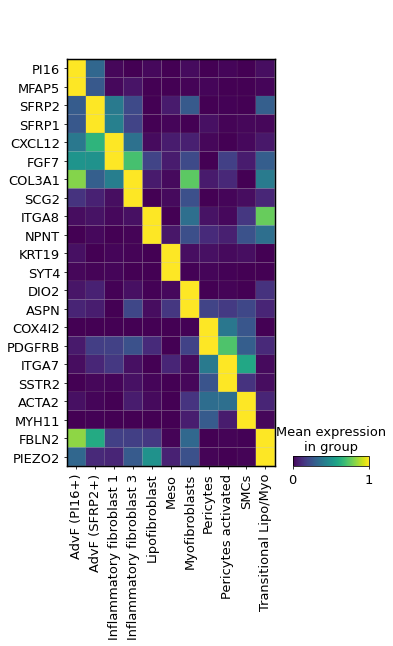

In [7]:
plt.rcParams['figure.dpi'] = 70
plt.rcParams.update({"font.size": 16})

markers = ["PI16", "MFAP5", "SFRP2", "SFRP1", "CXCL12", "FGF7", "COL3A1",
           "SCG2", "ITGA8", "NPNT", "KRT19", "SYT4", "DIO2", "ASPN",
           "COX4I2", "PDGFRB", "ITGA7", "SSTR2", "ACTA2", "MYH11", "FBLN2", "PIEZO2"]
mesenchyme = ['SMCs', 'Lipofibroblast', 'AdvF (SFRP2+)', 
       'Inflammatory fibroblast 3', 'Inflammatory fibroblast 1', "Transitional Lipo/Myo",
             "AdvF (PI16+)", "Meso", "Myofibroblasts", "Pericytes", "Pericytes activated"]

sc.pl.matrixplot(munich[munich.obs.cell_type.isin(mesenchyme)], markers, groupby = "cell_type",
                 swap_axes = True, standard_scale = "var")

#### h) Epithelial  cell types

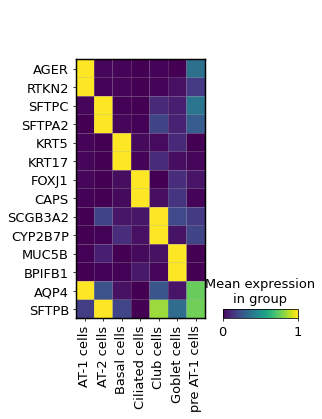

In [8]:
markers = ["AGER", "RTKN2", "SFTPC", "SFTPA2", "KRT5", "KRT17", "FOXJ1",
           "CAPS", "SCGB3A2", "CYP2B7P", "MUC5B", "BPIFB1", "AQP4", "SFTPB"]
epithelium = ["AT-1 cells", "AT-2 cells", "Ciliated cells", "Club cells",
              "Basal cells", "Goblet cells", "pre AT-1 cells"]

sc.pl.matrixplot(munich[munich.obs.cell_type.isin(epithelium)], markers, groupby = "cell_type",
                 swap_axes = True, standard_scale = "var")

#### i) Endothelial cell types

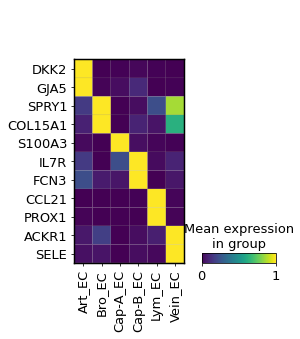

In [9]:
markers = ["DKK2", "GJA5", "SPRY1", "COL15A1", "S100A3", "IL7R",
           "FCN3", "CCL21", "PROX1", "ACKR1", "SELE"]
endothelium = ["Art_EC", "Bro_EC", "Cap-A_EC", "Cap-B_EC", "Lym_EC", "Vein_EC"]

sc.pl.matrixplot(munich[munich.obs.cell_type.isin(endothelium)], markers, groupby = "cell_type",
                 swap_axes = True, standard_scale = "var")

#### j) Leukocyte cell types

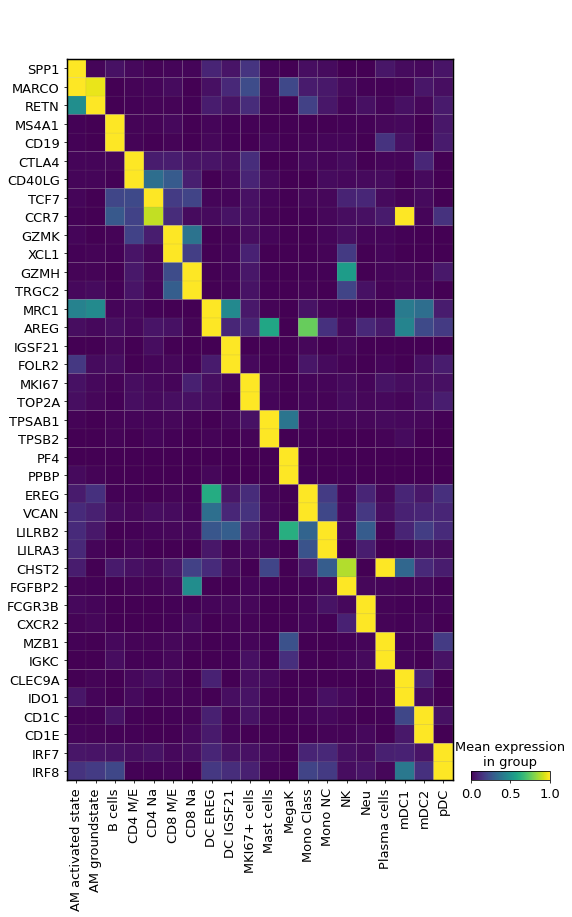

In [10]:
markers = ["SPP1","MARCO","RETN","MS4A1","CD19","CTLA4","CD40LG","TCF7","CCR7","GZMK","XCL1","GZMH","TRGC2",
           "MRC1","AREG","IGSF21","FOLR2","MKI67","TOP2A","TPSAB1","TPSB2","PF4","PPBP","EREG","VCAN",
           "LILRB2","LILRA3","CHST2","FGFBP2","FCGR3B","CXCR2","MZB1","IGKC","CLEC9A","IDO1","CD1C","CD1E",
           "IRF7","IRF8"]
leukocytes = ["Mast cells", "AM groundstate", "Plasma cells", "B cells", "AM activated state",
              "CD4 M/E", "CD4 Na", "NK", "CD8 M/E", "Mono NC", "Mono Class", "DC IGSF21", "mDC2", "CD8 Na", 
              "mDC1", "DC EREG", "Neu", "pDC", "MKI67+ cells", "MegaK"]

sc.pl.matrixplot(munich[munich.obs.cell_type.isin(leukocytes)], markers, groupby = "cell_type",
                 swap_axes = True, standard_scale = "var")